# Customer Segmentation - Clustering

Mall Customer data is an interesting dataset that has hypothetical customer data. It puts you in the shoes of the owner of a supermarket. We have customer data, and on this basis of the data, We divide the customers into various groups.

Features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (based on customer behaviour and spending nature)

In [47]:
#importing modules and the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv(r'C:\Users\mssre\Desktop\Data\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Exploratory Data Analysis

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

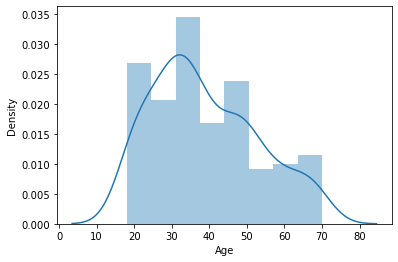

In [49]:
sns.distplot(df['Age'])

From this distribution plot we can deduce that mostly 20-50 aged people purchased from the mall

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

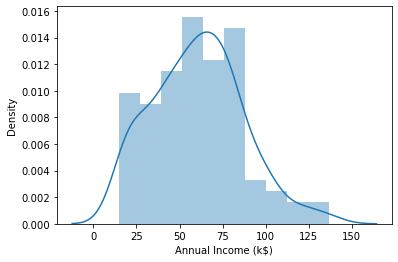

In [50]:
sns.distplot(df['Annual Income (k$)'])

Here major distributions of Annual income of the customers is 50k to 80k

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

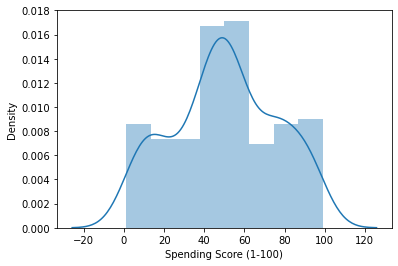

In [51]:
sns.distplot(df['Spending Score (1-100)'])

And the spendind score kind of has a close to normal distribution here, majority in 40-60

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

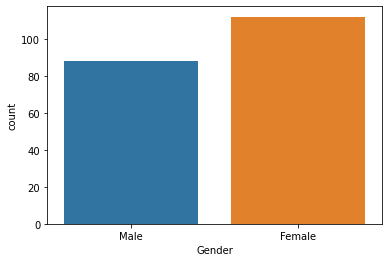

In [52]:
sns.countplot(df['Gender'])

The count plot of gender depicts that female customers had more purchases

In [62]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df['Gender']= enc.fit_transform(df['Gender'])

<AxesSubplot:>

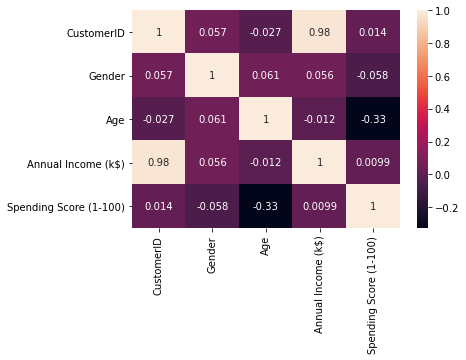

In [54]:
cor= df.corr()
sns.heatmap(cor,annot=True)

And from the heatmap, we can see that there are not many good correlations among variables. But there's negative correlation among spending score and the age, which means younger people tend to have less spending score.

### Clustering

From the below scatter plot of Spending Score Vs Annual income we can see multiple groups/segments of points, thus the clusters. But we don't seem to have a proper differentiation. So, we try implementing Kmeans clustering to make them into segments. 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

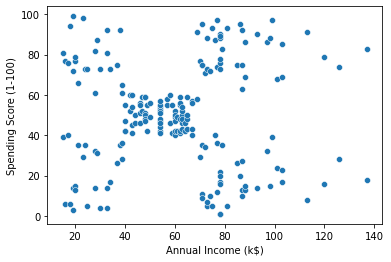

In [55]:
import seaborn as sns
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [56]:
x= df[['Annual Income (k$)','Spending Score (1-100)']]

From normally just looking, we can assume to have 5 segments, but can be different sometimes. In order to make sure our hunch is correct we perform <b> Elbow Method.



The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset

In [64]:
from sklearn.cluster import KMeans
wc=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wc.append(km.inertia_)

C:\Users\mssre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


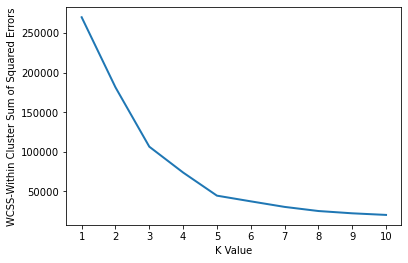

In [65]:
plt.plot(range(1,11),wc, linewidth=2)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS-Within Cluster Sum of Squared Errors")
plt.show()

From the above lineplot, we can see the 2nd dip/elbow starting 5 as K value, hence we take k=5 and implement

### Conclusion

In [59]:
km1=KMeans(n_clusters=5)
km1.fit(x)
y_pred=km1.predict(x)
df["label"] = y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,1
1,2,1,21,15,81,3
2,3,0,20,16,6,1
3,4,0,23,16,77,3
4,5,0,31,17,40,1


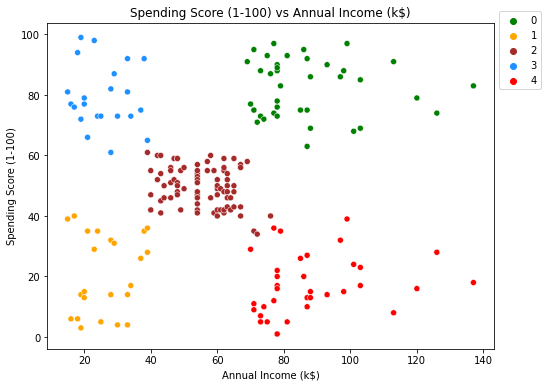

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'],data = df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend(bbox_to_anchor=(1,1.05))

Finally, we got 5 segments/clusters from the dataset and they were labelled into the data frame